# Employee exit surveys

This projects aggregates two surveys coming from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In them, records list employees who left the institutions. We are goind to delve into the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
# installing dependencies
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy

In [2]:
# importing dependencies
import pandas as pd
import numpy as np

In [3]:
# read data
dete_survey = pd.read_csv('data-master/employee-exit-surveys/dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('data-master/employee-exit-surveys/tafe_survey.csv')

In [4]:
# dete info
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [5]:
# dete head
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
# tafe info
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
# tafe head
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
## Clean useless columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [9]:
# Standarize dete columns
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ', '_').str.lower() 
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [10]:
# Rename tafe columns
tafe_survey_updated.rename(
    { 'Record ID': 'id', 
     'CESSATION YEAR': 'cease_date', 
     'Reason for ceasing employment': 'separationtype', 
     'Gender. What is your Gender?': 'gender',
     'CurrentAge. Current Age': 'age',
     'Employment Type. Employment Type': 'employment_status',
     'Classification. Classification': 'position',
     'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
     'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
    }, 
    axis=1,
    inplace=True
)

In [11]:
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employmen

In [12]:
dete_separation_types = dete_survey_updated["separationtype"].value_counts()
print(dete_separation_types)
print('')
tafe_separation_types = tafe_survey_updated["separationtype"].value_counts()
print(tafe_separation_types)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [13]:
dete_resignations = dete_survey_updated[ 
    dete_survey_updated["separationtype"].str.match('Resignation')
].copy()

tafe_resignations = tafe_survey_updated[ 
    tafe_survey_updated["separationtype"] == 'Resignation'
].copy()

print(dete_resignations.info())
print('')
print(tafe_resignations.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [14]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [15]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.replace('(\d){2}\/', '').astype('float64')

In [16]:
dete_resignations["cease_date"].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [17]:
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

<AxesSubplot:>

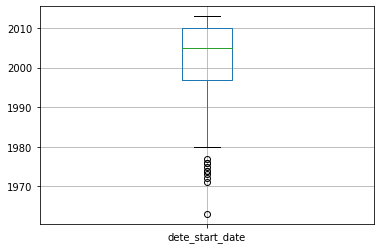

In [18]:
dete_resignations.boxplot(['dete_start_date'])

<AxesSubplot:>

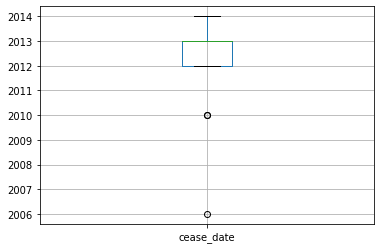

In [19]:
dete_resignations.boxplot(['cease_date'])

<AxesSubplot:>

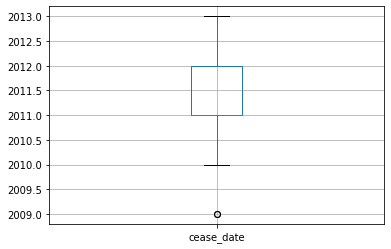

In [20]:
tafe_resignations.boxplot(['cease_date'])

In [21]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
print(dete_resignations["institute_service"].value_counts().sort_index(ascending=False))

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64


In [22]:
def update_institue_service(val):
    if val == 'Less than 1 year':
        return 0.0
    elif val == '1-2':
         return 1.0 if np.random.rand() > .5  else 2.0
    elif val == '3-4':
         return 3.0 if np.random.rand() > .5 else 4.0
    elif val == '5-6':
         return 5.0 if np.random.rand() > .5 else 6.0
    elif val == '11-20':
         return 11.0 if np.random.rand() > .5 else 20.0
    else:
         return 25.0 if np.random.rand() > .5 else 30.0          
            
tafe_resignations["institute_service"] = tafe_resignations[["institute_service"]].applymap(update_institue_service)
tafe_resignations["institute_service"].value_counts()

0.0     73
2.0     42
25.0    42
30.0    39
3.0     38
4.0     25
6.0     23
1.0     22
11.0    16
5.0     10
20.0    10
Name: institute_service, dtype: int64

In [23]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

tafe_dissatisfaction = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

tafe_resignations['dissatisfied'] = tafe_dissatisfaction.any(axis=1, skipna=False)

tafe_resignations_up = tafe_resignations.copy()

print('tafe_resignations')
print(tafe_resignations_up['dissatisfied'].value_counts())
print('')

dete_dissatisfaction = dete_resignations[[
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]].applymap(update_vals)

dete_resignations['dissatisfied'] = dete_dissatisfaction.any(axis=1, skipna=False)


dete_resignations_up = dete_resignations.copy()

print('dete_dissatisfaction')
print(dete_resignations_up['dissatisfied'].value_counts())
print('')



tafe_resignations
False    241
True      91
Name: dissatisfied, dtype: int64

dete_dissatisfaction
True    311
Name: dissatisfied, dtype: int64



In [24]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)

print(combined.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [25]:
combined_updated = combined.dropna(axis=1, thresh=500)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  613 non-null    float64
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(3), object(7)
memory usage: 55.9+ KB


In [26]:
combined_updated['institute_service'].value_counts()

0.0     93
3.0     58
2.0     56
25.0    44
1.0     44
30.0    41
4.0     41
6.0     40
5.0     33
11.0    20
20.0    17
9.0     14
7.0     13
13.0     8
8.0      8
15.0     7
12.0     6
17.0     6
10.0     6
14.0     6
22.0     6
18.0     5
16.0     5
23.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
36.0     2
28.0     2
26.0     2
27.0     1
42.0     1
29.0     1
35.0     1
41.0     1
49.0     1
38.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

In [27]:
# combined_updated[combined_updated['age'] == '21  25'] = '21-25'
# combined_updated[combined_updated['age'] == '41  45'] = '41-45'
# combined_updated[combined_updated['age'] == '46  50'] = '46-50'
# combined_updated[combined_updated['age'] == '26  30'] = '26-30'
# combined_updated[combined_updated['age'] == '36  40'] = '36-40'
# combined_updated[combined_updated['age'] == '31  35'] = '31-35'
# combined_updated[combined_updated['age'] == '56 or older'] = '56-60'
# combined_updated[combined_updated['age'] == '61 or older'] = '60-70'
# combined_updated[combined_updated['age'] == '20 or younger'] = '18-20'
# combined_updated['age'].value_counts()

In [28]:
def map_serivce(val):
    if val == 'Less than 1 year':
        return 0.0
    elif val == 'More than 20 years':
        return 25.0 if np.random.rand() > .5 else 30.0          
    elif val < 3.0:
        return 'New'
    elif val >= 3.0 and val <= 6.0:
        return 'Experienced'
    elif val >= 7.0 and val <= 10.0:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_serivce).copy()

combined_updated['service_cat'].value_counts(dropna=False)


<ipython-input-28-0a12f814a506>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_serivce).copy()


Veteran        245
New            193
Experienced    172
Established     41
Name: service_cat, dtype: int64

In [29]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [30]:
combined_updated['dissatisfied'].fillna(True, inplace=True)

/home/li0t/.local/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [31]:
combined_updated['dissatisfied'].value_counts(dropna=False)


True     410
False    241
Name: dissatisfied, dtype: int64

<AxesSubplot:xlabel='service_cat'>

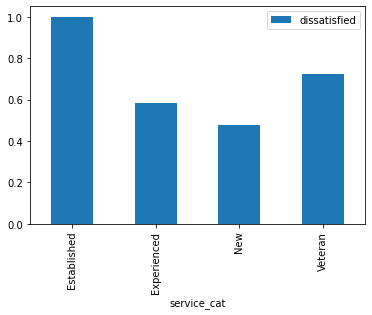

In [33]:
%matplotlib inline


combined_updated.pivot_table('dissatisfied', 'service_cat').plot(kind='bar')